In [2]:
# import zeep
# import numpy as np
# import math
# import time
# import tensorflow as tf

# import matplotlib.pyplot as plt

# from tensorflow import estimator
# from tensorflow import keras
# from tensorflow.keras.utils import *
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# from sklearn.model_selection import train_test_split

# from tensorflow.compat.v1.keras import backend as K

# import tensorflow_probability as tfp

In [1]:
import zeep
import numpy as np
import math
import time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.compat.v1 import estimator

from tensorflow import keras
from tensorflow.compat.v1.keras.utils import *
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.compat.v1.keras import backend as K
import tensorflow_probability as tfp

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
cubes = [1,2,3,4,5]
grad_data = np.array([]).reshape(0,9)
SGS_data = np.array([]).reshape(0,6)
for i in cubes:
    grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad.npy')])"
    SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
    exec(grad_line)
    exec(SGS_line)

In [4]:
# grad_data_rot_1 = grad_data[:, [4, 3, 5, 1, 0, 2, 7, 6, 8]]
# SGS_data_rot_1 = SGS_data[:, [1, 0, 2, 3, 5, 4]]

# grad_data_rot_2 = grad_data[:, [0, 2, 1, 6, 8, 7, 3, 5, 4]]
# SGS_data_rot_2 = SGS_data[:, [0, 2, 1, 4, 3, 5]]

# grad_data_rot_3 = grad_data[:, [4, 5, 3, 7, 8, 6, 1, 2, 0]]
# SGS_data_rot_3 = SGS_data[:, [1, 2, 0, 5, 4, 3]]

# grad_data_rot_4 = grad_data[:, [8, 6, 7, 2, 0, 1, 5, 3, 4]]
# SGS_data_rot_4 = SGS_data[:, [2, 0, 1, 4, 5, 3]]

# grad_data_rot_5 = grad_data[:, [8, 7, 6, 5, 4, 3, 2, 1, 0]]
# SGS_data_rot_5 = SGS_data[:, [2, 1, 0, 5, 4, 3]]

# print(np.shape(grad_data))
# grad_data = np.concatenate((grad_data, grad_data_rot_1, grad_data_rot_2, grad_data_rot_3, grad_data_rot_4, grad_data_rot_5))
# SGS_data = np.concatenate((SGS_data, SGS_data_rot_1, SGS_data_rot_2, SGS_data_rot_3, SGS_data_rot_4, SGS_data_rot_5))
# print(np.shape(grad_data))

In [5]:
# cubes = [1,3,4]
# grad_data = np.array([]).reshape(0,12)
# SGS_data = np.array([]).reshape(0,6)
# for i in cubes:
#     grad_line = "grad_data = np.vstack([grad_data,np.load('cube_" + str(i) + "_grad_p.npy')])"
#     SGS_line = "SGS_data = np.vstack([SGS_data,np.load('cube_" + str(i) + "_SGS.npy')])"
    
#     exec(grad_line)
#     exec(SGS_line)

In [3]:
print('Input Data Size:')
print(np.shape(grad_data))
print('Output Data Size:')
print(np.shape(SGS_data))

print('min and max input before scaling:')
print(np.amin(grad_data,0))
print(np.amax(grad_data,0))

print('min and max output before scaling:')
print(np.amin(SGS_data,0))
print(np.amax(SGS_data,0))

# x_grad_offset = -25
# x_grad_scale = 50

# y_SGS_offset = -1.1
# y_SGS_scale = 2.2

# x_grad_offset = 0
# x_grad_scale = [15,20,25,22,18,20,22,23,18]

# y_SGS_offset = [-0.5,-0.5,-0.5,0,0,0]
# y_SGS_scale = [0.5,0.55,0.5,0.4,0.4,0.4]

x_grad_offset = 0
x_grad_scale = 1

y_SGS_offset = 0
y_SGS_scale = 1

x = grad_data - x_grad_offset
x = x / x_grad_scale

y = SGS_data - y_SGS_offset
y = y / y_SGS_scale
# y = SGSsym

# x = (x-x.mean(axis = 0))/x.std(axis = 0)
# y = (y-y.mean(axis = 0))/y.std(axis = 0)

print('min and max input after scaling:')
print(np.amin(x,0))
print(np.amax(x,0))

print('min and max output after scaling:')
print(np.amin(y,0))
print(np.amax(y,0))

Input Data Size:
(625000, 9)
Output Data Size:
(625000, 6)
min and max input before scaling:
[-18.74556   -23.4333229 -30.9432316 -20.4714222 -16.5075932 -21.0008183
 -28.2827263 -24.87106   -17.15962  ]
[13.8737316 22.8848572 25.5311375 21.9776726 15.2345762 26.6753883
 23.98605   25.6773453 14.6427183]
min and max output before scaling:
[ 8.31633800e-05  5.61475754e-05  7.91251659e-05 -5.10315300e-01
 -3.90936852e-01 -4.28805172e-01]
[1.02092254 1.07496333 1.003601   0.41171658 0.6519352  0.36166   ]
min and max input after scaling:
[-18.74556   -23.4333229 -30.9432316 -20.4714222 -16.5075932 -21.0008183
 -28.2827263 -24.87106   -17.15962  ]
[13.8737316 22.8848572 25.5311375 21.9776726 15.2345762 26.6753883
 23.98605   25.6773453 14.6427183]
min and max output after scaling:
[ 8.31633800e-05  5.61475754e-05  7.91251659e-05 -5.10315300e-01
 -3.90936852e-01 -4.28805172e-01]
[1.02092254 1.07496333 1.003601   0.41171658 0.6519352  0.36166   ]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
batch_size = 512

In [6]:
def correlation_coefficient(y_true, y_pred):
  return tfp.stats.correlation(y_true, y_pred)

def correlation(y, y_hat):
  corr = tfp.stats.correlation(y,y_hat)
  return tf.math.reduce_mean(corr)

def correlation_coefficient_alvaro(y_true,y_pred):
    DNS = y_true
    ANN = y_pred

    N = batch_size

    num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

    den_term_DNS = N * tf.reduce_sum(tf.square(DNS),0) - tf.square(tf.reduce_sum(DNS,0))
    den_term_ANN = N * tf.reduce_sum(tf.square(ANN),0) - tf.square(tf.reduce_sum(ANN,0))
    den = tf.sqrt(tf.multiply(den_term_DNS,den_term_ANN))

    r = tf.divide(num,den)
    return r

# def cc_a0(y_true,y_pred):
#     DNS = y_true
#     ANN = y_pred

#     N = batch_size

#     num = N * tf.reduce_sum(tf.multiply(DNS,ANN),0) - tf.multiply(tf.reduce_sum(DNS,0),tf.reduce_sum(ANN,0))

#     den_sq_np = tf.make_ndarray(den_sq_proto)
#     den_sq0 = float(den_sq_np[0])
#     den0 = 

#     r = tf.divide(num,den)
#     return 512

def correlation_coefficient_theo(y_true, y_pred):
    DNS = y_true
    DNS_mean = tf.reduce_mean(DNS,0)
    num_term_DNS = DNS - DNS_mean
    
    ANN = y_pred
    ANN_mean = tf.reduce_mean(ANN,0)
    num_term_ANN = ANN - ANN_mean
    
    num = tf.reduce_mean(tf.multiply(num_term_DNS,num_term_ANN),0)

    den_term_DNS = tf.sqrt(tf.reduce_mean(tf.square(num_term_DNS),0))
    den_term_ANN = tf.sqrt(tf.reduce_mean(tf.square(num_term_ANN),0))
    
    den = tf.multiply(den_term_DNS,den_term_ANN)

    r = tf.divide(num,den)
    return r

def correlation_coefficient_chooser(y_true, y_pred):
    r = correlation_coefficient_theo(y_true, y_pred)
    return r

def cc_0(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[0]

def cc_1(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[1]

def cc_2(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[2]

def cc_3(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[3]

def cc_4(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[4]

def cc_5(y_true, y_pred):
    r = correlation_coefficient_chooser(y_true, y_pred)
    return r[5]

In [7]:
#Defining neural network architecture EDIT THIS CODE

input_vars = 9
output_vars = 6
keras.backend.clear_session()
hidden_layer_nodes = np.array([i * 24 for i in [2,1,2]]) #each item in the array is a hidden layer, the value being the number of nodes within the layer
# hidden_layer_nodes = np.array([40,40,40,40,40])
activation_function = ['relu'] #each item in the array is an activation function
layers = len(hidden_layer_nodes)


model = Sequential()
#Iterating through layer_nodes and activation_function arrays to define neural net. architecure
for i in range(layers):
    nodes = hidden_layer_nodes[i]
    try:
        func = activation_function[i]
    except:
        func = activation_function[0]
    model.add(Dense(units=nodes, activation = func, input_dim = input_vars))#, kernel_initializer = tf.keras.initializers.GlorotNormal()))
model.add(Dense(units=output_vars))

#compile model, trying to minimise mean squared error and using the Adam algorithm to fit this
opt = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss='mse', optimizer=opt, metrics=[cc_0,cc_1,cc_2,cc_3,cc_4,cc_5])
# model.compile(loss='mse', optimizer=opt, metrics=[correlation_coefficient_alvaro])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                1200      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 294       
Total params: 3,150
Trainable params: 3,150
Non-trainable params: 0
_________________________________________________________________


In [8]:
start_time = time.time()
epoch_number = 50
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch_number, batch_size=512, verbose = 1)
print("--- %s seconds ---" % (time.time() - start_time))

Train on 500000 samples, validate on 125000 samples
Epoch 1/50
488960/500000 [============================>.] - ETA: 0s - loss: 0.0040 - cc_0: 0.4172 - cc_1: 0.4153 - cc_2: 0.3952 - cc_3: 0.0591 - cc_4: 0.1456 - cc_5: 0.1637

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


500000/500000 [==============================] - 3s 5us/sample - loss: 0.0039 - cc_0: 0.4204 - cc_1: 0.4190 - cc_2: 0.3988 - cc_3: 0.0609 - cc_4: 0.1456 - cc_5: 0.1663 - val_loss: 3.7642e-04 - val_cc_0: 0.5633 - val_cc_1: 0.5740 - val_cc_2: 0.5721 - val_cc_3: 0.1204 - val_cc_4: 0.2059 - val_cc_5: 0.2658
Epoch 2/50
500000/500000 [==============================] - 2s 3us/sample - loss: 3.5385e-04 - cc_0: 0.5978 - cc_1: 0.6004 - cc_2: 0.5890 - cc_3: 0.1687 - cc_4: 0.2207 - cc_5: 0.3241 - val_loss: 3.4991e-04 - val_cc_0: 0.6193 - val_cc_1: 0.6202 - val_cc_2: 0.6063 - val_cc_3: 0.2063 - val_cc_4: 0.2448 - val_cc_5: 0.3688
Epoch 3/50
500000/500000 [==============================] - 1s 3us/sample - loss: 3.3241e-04 - cc_0: 0.6359 - cc_1: 0.6392 - cc_2: 0.6193 - cc_3: 0.2486 - cc_4: 0.2635 - cc_5: 0.3840 - val_loss: 3.4234e-04 - val_cc_0: 0.6512 - val_cc_1: 0.6491 - val_cc_2: 0.6348 - val_cc_3: 0.2950 - val_cc_4: 0.2925 - val_cc_5: 0.3923
Epoch 4/50
500000/500000 [=============================

Epoch 27/50
500000/500000 [==============================] - 2s 3us/sample - loss: 2.5325e-04 - cc_0: 0.7127 - cc_1: 0.7146 - cc_2: 0.7118 - cc_3: 0.6310 - cc_4: 0.6213 - cc_5: 0.6271 - val_loss: 2.5850e-04 - val_cc_0: 0.7107 - val_cc_1: 0.7117 - val_cc_2: 0.7152 - val_cc_3: 0.6240 - val_cc_4: 0.6227 - val_cc_5: 0.6297
Epoch 28/50
500000/500000 [==============================] - 2s 3us/sample - loss: 2.5304e-04 - cc_0: 0.7137 - cc_1: 0.7139 - cc_2: 0.7122 - cc_3: 0.6321 - cc_4: 0.6228 - cc_5: 0.6277 - val_loss: 2.5799e-04 - val_cc_0: 0.7127 - val_cc_1: 0.7102 - val_cc_2: 0.7157 - val_cc_3: 0.6226 - val_cc_4: 0.6225 - val_cc_5: 0.6326
Epoch 29/50
500000/500000 [==============================] - 1s 3us/sample - loss: 2.5291e-04 - cc_0: 0.7134 - cc_1: 0.7146 - cc_2: 0.7122 - cc_3: 0.6306 - cc_4: 0.6232 - cc_5: 0.6293 - val_loss: 2.6015e-04 - val_cc_0: 0.7115 - val_cc_1: 0.7105 - val_cc_2: 0.7142 - val_cc_3: 0.6301 - val_cc_4: 0.6162 - val_cc_5: 0.6342
Epoch 30/50
500000/500000 [==========

In [66]:
def Smag_Tau(grad):
    print(grad[0])
    smagoinsky_constant = 0.1677

    filter_width_n = 9
    DNS_spacing = 2*np.pi / 1024
    filter_width_x = filter_width_n * DNS_spacing

    grad_transpose = np.zeros_like(grad)
    transpose_indices = {0:0, 1:3, 2:6, 3:1, 4:4, 5:7, 6:2, 7:5, 8:8}
    for i in range(9):
        transpose_index = transpose_indices[i]
        grad_transpose = grad[transpose_index]
    print(np.shape(grad))
    S_ij = 0.5 * (grad + grad_transpose)
    print(np.shape(S_ij))
    n_cells = np.shape(grad)[0]
    n_components = np.shape(grad)[1]
    
    S_ij_norm = np.zeros(n_cells)
    for k in range(n_components):
        S_ij_norm[:] += 2 * S_ij[:,k] * S_ij[:,k]
    S_ij_norm = np.sqrt(S_ij_norm)
    print(np.shape(S_ij_norm))
    
    eddy_viscosity = np.zeros_like(S_ij)
    for i in range(n_components):
        eddy_viscosity[:,i] = S_ij_norm * (smagoinsky_constant * filter_width_x)**2
    
    y_smag = -2 * eddy_viscosity * S_ij
    print(np.shape(y_smag))
    print(y_smag[0])
    symm_indices = {0:8, 1:4, 2:0, 3:1, 4:2, 5:5}
    y_smag_symm = np.zeros((n_cells, 6))
    for symm_index in range(6):
        tensor_index = symm_indices[symm_index]
        y_smag_symm[:,symm_index] = y_smag[:,tensor_index]
    print(np.shape(y_smag_symm))
    print(y_smag_symm[0])
    return y_smag_symm
    
y_smag_pred = Smag_Tau(x)

[ 2.5578866   4.605805    2.263476    2.78921962  6.47875738  4.12531567
 -2.16628075 -0.3214786  -8.209966  ]
(625000, 9)
(625000, 9)
(625000,)
(625000, 9)
[-0.0088055  -0.0035102  -0.00487207 -0.01204529 -0.00553142 -0.00749303
  0.00669387 -0.00060881  0.01236904]
(625000, 6)
[ 0.01236904 -0.00553142 -0.0088055  -0.0035102  -0.00487207 -0.00749303]


In [67]:
y_swapped_first_and_third = y
y_swapped_first_and_third[:,0] = y[:,2]
y_swapped_first_and_third[:,2] = y[:,0]
with tf.Session() as sess:
#     smag_cc_0 = cc_0(y, y_smag_pred).eval()
    smag_cc = correlation_coefficient_theo(y_swapped_first_and_third, y_smag_pred).eval()
    
#     print(smag_cc_0)
    print(smag_cc) 
# npy.cc = np.corrcoef(y, y_smag_pred)

[ 0.21720261  0.20670854 -0.22430164  0.14604962  0.13473166  0.12694305]


In [75]:
def MSE(y, y_pred):
    error = y - y_pred
    n = np.shape(error)[0]
    error_squared = np.square(error)
    MSE = np.sum(error_squared)
    MSE = MSE / n
    return MSE

MSE_smag = MSE(y, y_smag_pred)
print(np.shape(MSE_smag))
print(MSE_smag - 4.364924e-3)

()
2.337596886892168e-10


In [152]:
transpose_indices = {0:0, 1:3, 2:6, 3:1, 4:4, 5:7, 6:2, 7:5, 8:8}
for i in range(9):
    transpose_index = transpose_indices[i]
    print(i, "->", transpose_index)
    
tensor1 = np.array([1, 2, 3, 4, 5, 6])
tensor2 = np.array([1, 2, 3, 4, 5, 6])
norm = np.sqrt(2 * np.tensordot(tensor1, tensor2, axes = 1))
print(norm)

0 -> 0
1 -> 3
2 -> 6
3 -> 1
4 -> 4
5 -> 7
6 -> 2
7 -> 5
8 -> 8
13.490737563232042


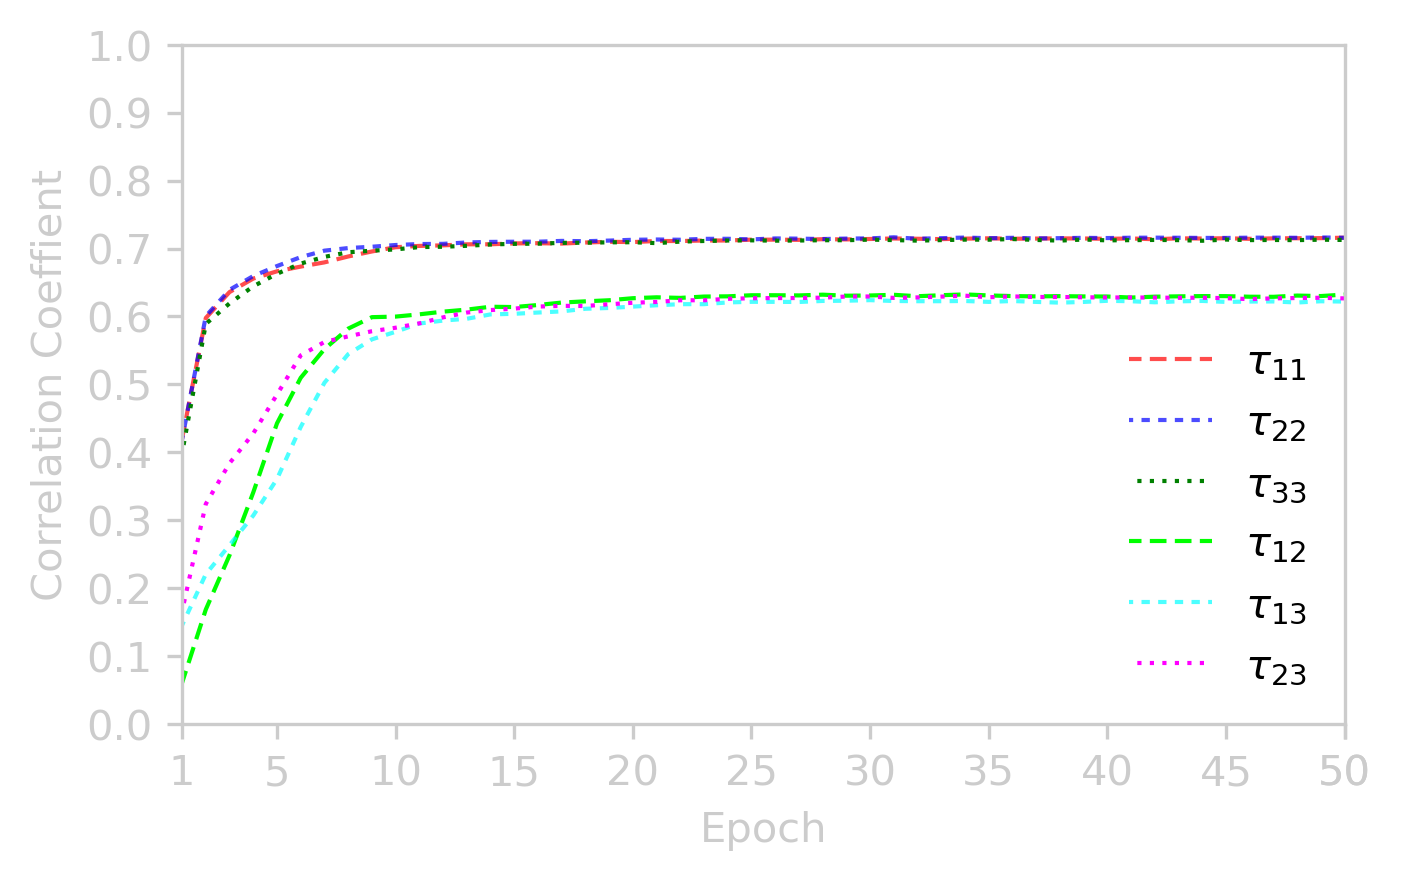

In [11]:
mpl.rcParams['text.usetex'] = False
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize = (5,3))

plot_epochs = 50;

x_array = np.arange(1, plot_epochs+1)

ax.plot(x_array, history.history['cc_0'][0:plot_epochs], color='red',alpha=0.7,linestyle=(1, (4, 2)),label=r'$\tau_{11}$',linewidth=1)
ax.plot(x_array, history.history['cc_1'][0:plot_epochs],color='blue',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{22}$',linewidth=1)
ax.plot(x_array, history.history['cc_2'][0:plot_epochs],color='green',linestyle=(1, (1, 2)),label=r'$\tau_{33}$',linewidth=1)
ax.plot(x_array, history.history['cc_3'][0:plot_epochs],color='lime',alpha=1,linestyle=(1, (4, 2)),label=r'$\tau_{12}$',linewidth=1)
ax.plot(x_array, history.history['cc_4'][0:plot_epochs],color='cyan',alpha=0.7,linestyle=(1, (2, 2)),label=r'$\tau_{13}$',linewidth=1)
ax.plot(x_array, history.history['cc_5'][0:plot_epochs],color='fuchsia',linestyle=(1, (1, 2)),label=r'$\tau_{23}$',linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(xticks, plot_epochs)
xticks = np.array([y for y in xticks if y != 0])
xticks = np.insert(xticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
ax.set_xticks(ticks = xticks)
ax.set_yticks(ticks = yticks)

ax.spines['bottom'].set_color('0.8')
ax.spines['top'].set_color('0.8')
ax.spines['left'].set_color('0.8')
ax.spines['right'].set_color('0.8')
ax.xaxis.label.set_color('0.8')
ax.tick_params(axis='x', colors='0.8')
ax.yaxis.label.set_color('0.8')
ax.tick_params(axis='y', colors='0.8')

plt.ylabel("Correlation Coeffient")
plt.xlabel("Epoch")

ax.legend(frameon=False,loc='lower right')

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

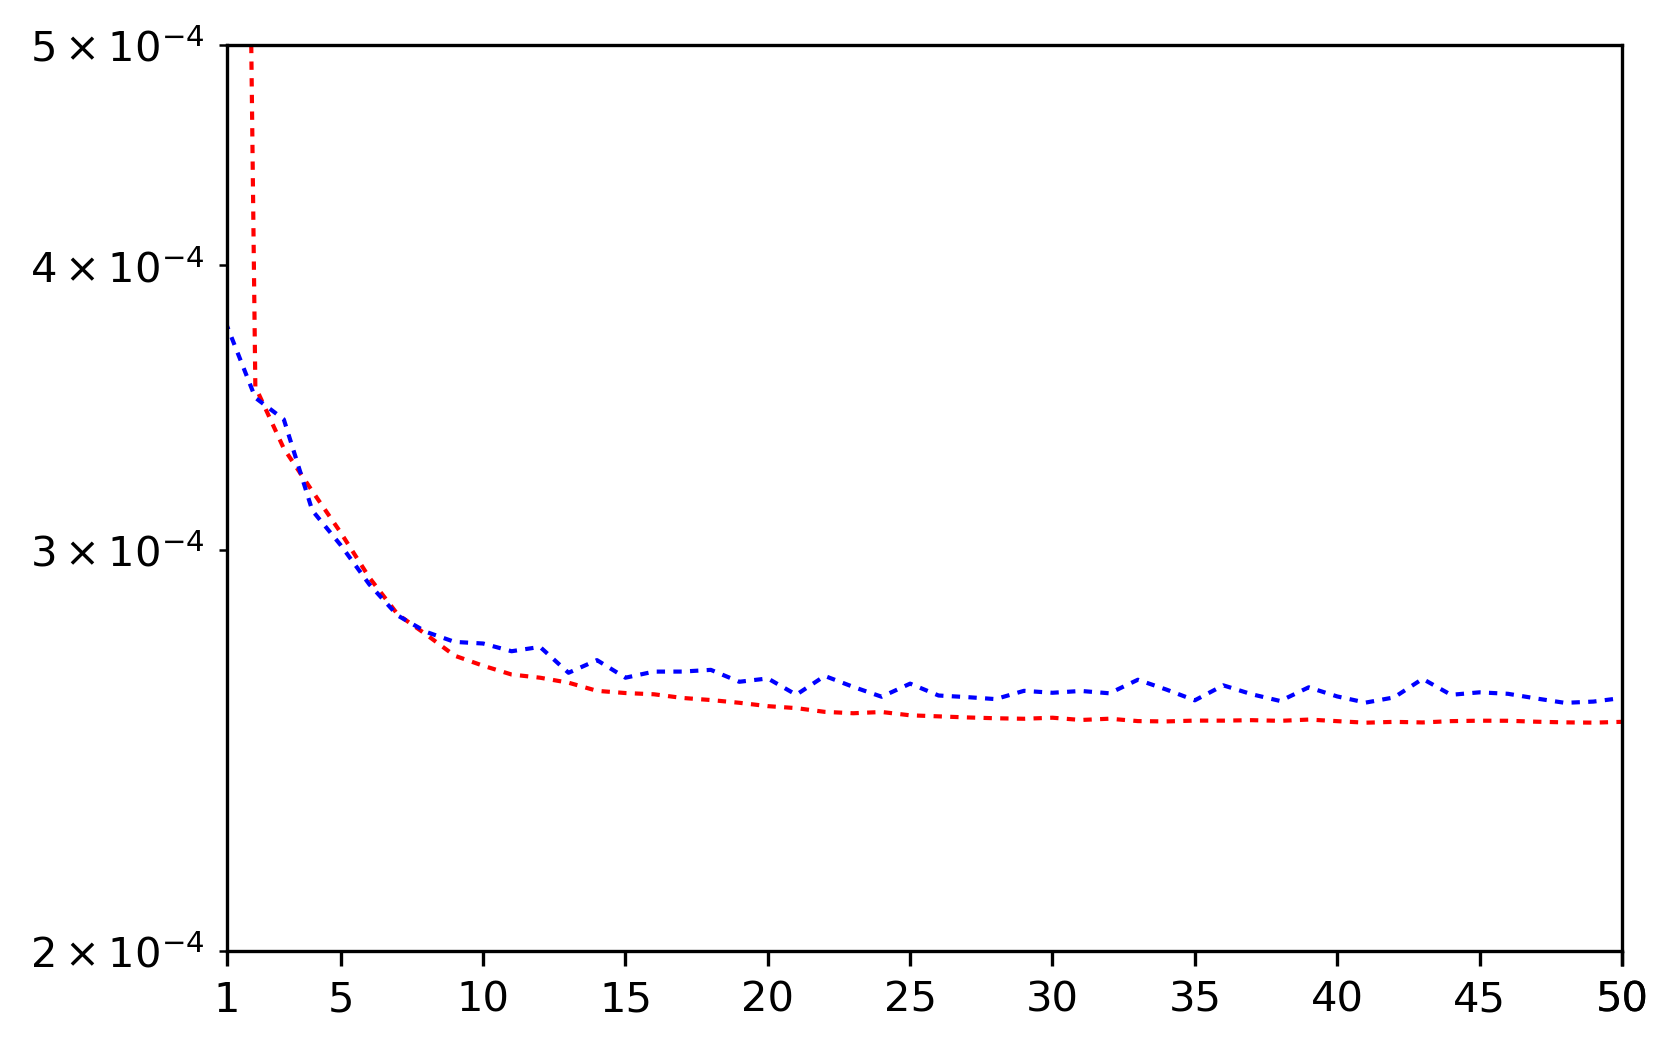

In [15]:
plot_epochs = 50
x_array = np.arange(1, plot_epochs+1)
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(x_array,history.history['loss'][0:plot_epochs], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
ax.plot(x_array,history.history['val_loss'][0:plot_epochs], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

ax.ylim([0.0002,0.0005])
plt.yscale("log")
plt.xlim(1, plot_epochs)

ticks = np.arange(0, plot_epochs+1, 5)
ticks = np.append(ticks, plot_epochs)
ticks = np.array([y for y in ticks if y != 0])
ticks = np.insert(ticks, 0, 1)
plt.xticks(ticks = ticks)



ax.spines['bottom'].set_color('0.8')
ax.spines['top'].set_color('0.8')
ax.spines['left'].set_color('0.8')
ax.spines['right'].set_color('0.8')
ax.xaxis.label.set_color('0.8')
ax.tick_params(axis='x', colors='0.8')
ax.yaxis.label.set_color('0.8')
ax.tick_params(axis='y', colors='0.8')

mpl.rcParams['figure.dpi'] = 300

plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

plt.show()

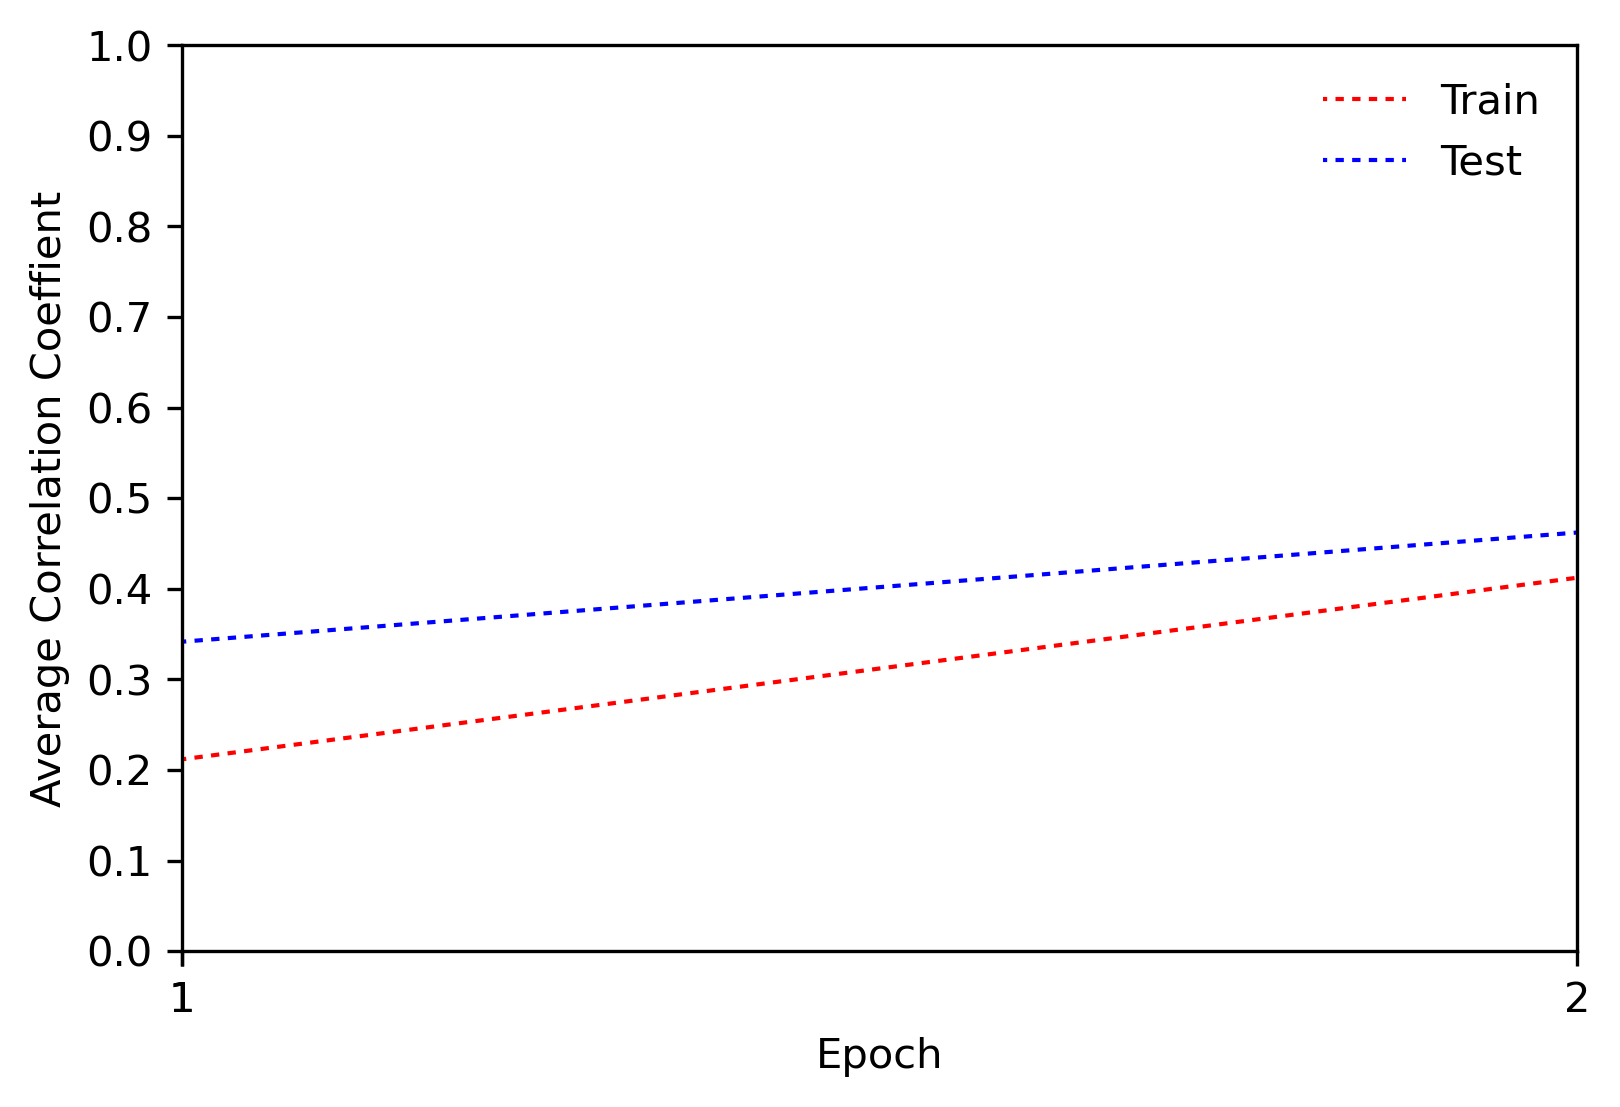

In [80]:
average_cc_train = np.mean([history.history['cc_0'],
                            history.history['cc_1'],
                            history.history['cc_2'],
                            history.history['cc_3'],
                            history.history['cc_4'],
                            history.history['cc_5']],
                           axis = 0)

average_cc_test = np.mean([history.history['val_cc_0'],
                            history.history['val_cc_1'],
                            history.history['val_cc_2'],
                            history.history['val_cc_3'],
                            history.history['val_cc_4'],
                            history.history['val_cc_5']],
                           axis = 0)

plt.plot(x_array,average_cc_train, color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
plt.plot(x_array,average_cc_test, color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

# plt.loglog(history.history['loss'], color='red', linestyle=(1, (2, 2)), label=r'Train', linewidth=1)
# plt.loglog(history.history['val_loss'], color='blue', linestyle=(1, (2, 2)), label=r'Test', linewidth=1)

plt.ylim(0,1)
plt.xlim(1,plot_epochs)

xticks = np.arange(0, plot_epochs+1, 5)
xticks = np.append(ticks, plot_epochs)
xticks = np.array([y for y in ticks if y != 0])
xticks = np.insert(ticks, 0, 1)
yticks = np.arange(0, 1.1, 0.1)
plt.xticks(ticks = xticks)
plt.yticks(ticks = yticks)

plt.ylabel("Average Correlation Coeffient")
plt.xlabel("Epoch")

plt.legend(frameon=False,loc='upper right')

In [ ]:
# print(history.history['correlation_coefficient_theo'])

In [ ]:
# model.save("24_05_22_NN01.h5")

In [83]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
    
frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, './', '03_06_22_NN01.pb', as_text=False)

'./03_06_22_NN01.pb'

In [ ]:
Xt = np.array([[15.108, 5.39327, -6.04762, 12.0882, -7.9697, -17.251, 6.47427, 3.87336, -10.3209]])
print(np.shape(Xt))
Yt_predict = model.predict(Xt)
print(Yt_predict)

In [87]:
model.outputs[0]

<tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 6) dtype=float32>

In [210]:
# X = x
# Y = y

In [218]:
# learning_rate = 0.01
# batch_size = 2048
# n_inputs = 9
# n_hidden_1 = 24
# n_hidden_2 = 12
# n_hidden_3 = 24
# n_data_points = np.shape(X)[0]
# n_classes = 6
# frac = 0.8

In [212]:
# def TestTrainExtract(DataFrame,frac):
#     TrainingDF = DataFrame.sample(frac=frac,random_state=1)
#     TestDF = DataFrame.drop(index = TrainingDF.index.values,axis = 1)
#     return TrainingDF, TestDF

# def norm(x):
#     return (x - TrainStats['mean']) / TrainStats['std']

# def SplitTestEval(TrainFrame):
#     test_x, test_y = np.split(TrainFrame,[n_inputs],axis=1)
#     return test_x, test_y

# def MLPerceptron(x, weights, biases):

#     '''
#     x: Placeholder for Data Input
#     Weights : Dicts of Weights
#     Biases: Dicts of Biases
#     '''

#     # First Layer
#     layer_1 = tf.add(tf.matmul(x,weights['w1']),biases['b1'])
#     layer_1 = tf.nn.sigmoid(layer_1)

#     # Second layer
#     layer_2 = tf.add(tf.matmul(layer_1,weights['w2']),biases['b2'])
#     layer_2 = tf.nn.sigmoid(layer_2)

#     # Third Layer
#     layer_3 = tf.add(tf.matmul(layer_2,weights['w3']),biases['b3'])
#     layer_3 = tf.nn.sigmoid(layer_3)

#     # Output Layer
#     OutputLayer = tf.matmul(layer_3,weights['out']) + biases['out']

#     return OutputLayer

# def NextBatch(BatchSize, BatchIter, RemainingData):
#     Batch = RemainingData.sample(n = BatchSize,random_state=1)
#     RemainingData.drop(index = Batch.index.values,axis = 1, inplace = True)
#     Batch_x, Batch_y = np.split(Batch,[n_inputs],axis=1)
#     return Batch_x, Batch_y

# def NextBatchNormalised(BatchSize, BatchIter, RemainingData):
#     Batch = RemainingData.sample(n = BatchSize,random_state=1)
#     RemainingData.drop(index = Batch.index.values,axis = 1, inplace = True)
#     return Batch

# #MAKE THE TRAIN AND TEST DATA
# # Train, Test = TestTrainExtract(DataFrame, frac)

# # test_x, test_y = SplitTestEval(Test)
# # train_x, train_y = SplitTestEval(Train)

# train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

# # TrainStats = train_x.describe().transpose()

# # NormedTest_x = norm(test_x)
# # NormedTrain_x = norm(train_x)

# NormedTest_x = test_x

# NormedTrain_x = train_x
# # print(min(train_x))
# # print(max(train_x))

# # print(min(test_x))
# # print(max(test_x))

# # sns.pairplot(Train[["u", "v","w"]], diag_kind="kde")

# #CREATE THE WEIGHTS AND BIASES DICTIONARIES
# weights = {
#     'w1':tf.Variable(tf.random_normal([n_inputs,n_hidden_1])),
#     'w2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
#     'w3':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3])),
#     'out':tf.Variable(tf.random_normal([n_hidden_3,n_classes]))
# }

# biases = {
#     'b1':tf.Variable(tf.random_normal([n_hidden_1])),
#     'b2':tf.Variable(tf.random_normal([n_hidden_2])),
#     'b3':tf.Variable(tf.random_normal([n_hidden_3])),
#     'out':tf.Variable(tf.random_normal([n_classes]))
# }

# x = tf.placeholder(tf.float32,shape = [None,n_inputs])
# y = tf.placeholder(tf.float32,shape = [None,n_classes])

# #ASSIGN THE OPISMISIERS AND COST FUNCTION
# Prediction = MLPerceptron(x, weights, biases)
# Cost = tf.reduce_mean(tf.square(Prediction - y))
# Optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Cost)
# #Optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(Cost)

In [219]:
# #with tf.Session() as sess:
# # tf.InteractiveSession.close(sess)
# sess = tf.InteractiveSession()
# init = tf.initialize_all_variables()
# sess.run(init)
# avg_cost_old = 100000
# cost_arr = []
# epochs = 10

# for epoch in range(epochs):
#     avg_cost = 0.0
#     total_batch_number = int(n_data_points*frac/batch_size)
#     RemainingData_x = NormedTrain_x.copy()
#     RemainingData_y = train_y.copy()

#     for BatchIter in range (total_batch_number):
#         Batch_x = NextBatchNormalised(batch_size, BatchIter, RemainingData_x)
#         Batch_y = NextBatchNormalised(batch_size, BatchIter, RemainingData_y)
#         _,c = sess.run([Optimizer,Cost],feed_dict={x:Batch_x,y:Batch_y})
#         avg_cost += c/total_batch_number

#     print("Epoch: {}, cost: {}".format(epoch+1, avg_cost))
#     cost_arr.append(avg_cost)
#     if (avg_cost_old > avg_cost):
#         avg_cost_old = avg_cost
#     else:
#         break

# print("Complete Model {} Epochs of training".format(epoch+1))

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


AttributeError: 'numpy.ndarray' object has no attribute 'sample'